In [ ]:
import pandas as pd
import numpy as np
import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
from collections import Counter
import itertools 

In [ ]:

stop_word_dic={}

with open('sample_data/extra_stop.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            # displaying the words           
            stop_word_dic[word]=word
with open('sample_data/stop_words_english.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            # displaying the words           
            stop_word_dic[word]=word



closed_class_stop_words = ['a', 'the', 'an', 'and', 'or', 'but', 'about', 'above', 'after', 'along', 'amid', 'among', \
                           'as', 'at', 'by', 'for', 'from', 'in', 'into', 'like', 'minus', 'near', 'of', 'off', 'on', \
                           'onto', 'out', 'over', 'past', 'per', 'plus', 'since', 'till', 'to', 'under', 'until', 'up', \
                           'via', 'vs', 'with', 'that', 'can', 'cannot', 'could', 'may', 'might', 'must', \
                           'need', 'ought', 'shall', 'should', 'will', 'would', 'have', 'had', 'has', 'having', 'be', \
                           'is', 'am', 'are', 'was', 'were', 'being', 'been', 'get', 'gets', 'got', 'gotten', \
                           'getting', 'seem', 'seeming', 'seems', 'seemed', \
                           'enough', 'both', 'all', 'your' 'those', 'this', 'these', \
                           'their', 'the', 'that', 'some', 'our', 'no', 'neither', 'my', \
                           'its', 'his' 'her', 'every', 'either', 'each', 'any', 'another', \
                           'an', 'a', 'just', 'mere', 'such', 'merely' 'right', 'no', 'not', \
                           'only', 'sheer', 'even', 'especially', 'namely', 'as', 'more', \
                           'most', 'less' 'least', 'so', 'enough', 'too', 'pretty', 'quite', \
                           'rather', 'somewhat', 'sufficiently' 'same', 'different', 'such', \
                           'when', 'why', 'where', 'how', 'what', 'who', 'whom', 'which', \
                           'whether', 'why', 'whose', 'if', 'anybody', 'anyone', 'anyplace', \
                           'anything', 'anytime' 'anywhere', 'everybody', 'everyday', \
                           'everyone', 'everyplace', 'everything' 'everywhere', 'whatever', \
                           'whenever', 'whereever', 'whichever', 'whoever', 'whomever' 'he', \
                           'him', 'his', 'her', 'she', 'it', 'they', 'them', 'its', 'their', 'theirs', \
                           'you', 'your', 'yours', 'me', 'my', 'mine', 'I', 'we', 'us', 'much', 'and/or',"wa","ha",",","n't" ,"”" ,"“" ,"’"
                           ]

In [ ]:


col_names=['ID', 'label', 'statement', 'subjeect','speaker','job_title','state_info','party_affiliation',  'false_counts','half_true_counts','mostly_true_counts', 'pants_on_fire_counts','context','context1'] 

df_L=pd.read_csv("sample_data/train.tsv" ,sep='\t',names=col_names,header=None)
df_true= pd.read_csv("sample_data/true_news.csv")
df_fake=pd.read_csv("sample_data/fake_n.csv")
df_pants=pd.read_csv("sample_data/pants_on_fire.csv")

# New Section

In [ ]:
df_L.groupby('label').count()
df_L_true = df_L.loc[(df_L['label'] == 'true')]
df_L_false= df_L.loc[(df_L['label'] == 'false')]


In [ ]:
def make_dic():
  for stop in closed_class_stop_words:
    stop_word_dic[stop]=stop           
make_dic()  
def clean_me(string):
  return remove_stop_words(word_tokenize(string))
def remove_stop_words(text):
  result=[]
  for word in text:
    word=word.lower()
    word=lemmatizer.lemmatize(word)
    if word in stop_word_dic:
      continue
    else:
      result.append(word)
  return result


     




In [ ]:
def clean_data_frameTF_IDF(df,AP,col="Statement"):
  text=df[col]
  clean_text=[]
  id=[]
  Link=[]
  df_clean=pd.DataFrame()
  for index, row in df.iterrows():
    text=row[col]
    res=" ".join(clean_me(text))
    clean_text.append(res)
    if col =="Statement":
      id.append(row['Date'])
      Link.append(row['Link'])
  if(AP):
      for index, row in df_pants.iterrows():
        text=row[col]
        res=" ".join(clean_me(text))
        clean_text.append(res)
        if col =="Statement":
          id.append(row['Date'])
          Link.append(row['Link'])

  if col =="Statement":
    #, "link":Link
    return pd.DataFrame({'Date': id, 'Clean_text': clean_text}),clean_text
  else:
    return pd.DataFrame({'Clean_tweet': clean_text})

df_clean_true=clean_data_frameTF_IDF(df_true,False)
df_clean_false=clean_data_frameTF_IDF(df_fake,True)
df_clean_fire=clean_data_frame(df_pants)
df_L_false_clean=clean_data_frame(df_L_false,"statement")
df_L_true_clean=clean_data_frame(df_L_true,"statement")

In [ ]:
def clean_data_frame(df,AP,col="Statement"):
  text=df[col]
  clean_text=[]
  id=[]
  Link=[]
  df_clean=pd.DataFrame()
  for index, row in df.iterrows():
    text=row[col]
  #text = re.sub(r'@.+', text)
    res=clean_me(text)
    clean_text.append(res)
    if col =="Statement":
      id.append(row['Date'])
      Link.append(row['Link'])
  
  #clean_text.append(clean_me(row[' text']))
  if(AP):
    for index, row in df_pants.iterrows():
      text=row[col]
    #text = re.sub(r'@.+', text)
      res=clean_me(text)
      clean_text.append(res)
      if col =="Statement":
        id.append(row['Date'])
        Link.append(row['Link'])

  if col =="Statement":
    return pd.DataFrame({'Date': id, 'Clean_text': clean_text, "link":Link})
  else:
    return pd.DataFrame({'Clean_tweet': clean_text})

df_clean_true_list=clean_data_frame(df_true,False)
df_clean_false_list=clean_data_frame(df_fake,True)
df_clean_fire=clean_data_frame(df_pants)
df_L_false_clean=clean_data_frame(df_L_false,"statement")
df_L_true_clean=clean_data_frame(df_L_true,"statement")



In [ ]:
df_clean_true.head()

,Date,Clean_text,link
0,"March 15, 2022","[virginia, woman, paid, 80, cent, dollar, paid, virginia, men]",https://www.politifact.com/factchecks/2022/mar/18/tim-kaine/kaine-correctly-describes-virginias-pay-gap-betwee/
1,"February 21, 2022","[florida, 49th, nation, medicaid, funding, people, disability]",https://www.politifact.com/factchecks/2022/mar/14/nikki-fried/fact-checking-nikki-frieds-claim-about-floridas-me/
2,"February 27, 2022","[1, large, fully, vaccinated, teenager, 2, large, fully, vaccinated, five-, 11-, year-olds]",https://www.politifact.com/factchecks/2022/mar/11/kathy-hochul/new-york-leader-vaccines-young-people-among-large-/
3,"February 3, 2022","[stride, reducing, carbon, emission]",https://www.politifact.com/factchecks/2022/mar/11/glenn-grothman/us-making-progress-cutting-greenhouse-gas-emission/
4,"January 22, 2022","[ongoing, pandemic, park, attendance, highest]",https://www.politifact.com/factchecks/2022/mar/09/robert-ortt/did-ny-state-park-attendance-set-record-during-pan/


In [ ]:

def plotAll(df,name):
  res=""
  word_dic={}
  res=" "
  row=df.shape[0]
  for index in range(row):
    text = df.Clean_tweet[index]
 
    
    for el in text:
      if(el =="wa" or el =="ha" or el=="," or el =="n't" or el =="”"  or el =="“" or el =="’" ):
        continue
      
      if(el in word_dic):

        word_dic[el]+=1
      else:
        word_dic[el]=1
      res=res+" "+str(el)

  words=res.split(' ')
  bigrams = zip(words, words[1:])
  bg=[]
  for w1 in bigrams:
    bg.append(w1[0]+"_"+w1[1])
  
  counts = Counter(bg)

  if(name=="fake"):
    
    row=df_clean_fire.shape[0]
    for index in range(row):
      text = df_clean_fire.Clean_tweet[index]
      #bigrm = nltk.bigrams(text)
      #print(bigrm)
      
      for el in text:
        if(el =="wa" or el =="ha" or el=="," or el =="n't" or el =="”"  or el =="“" or el =="’" ):
          continue
        
        if(el in word_dic):

          word_dic[el]+=1
        else:
          word_dic[el]=1
        res=res+" "+str(el)

    words=res.split(' ')
    bigrams = zip(words, words[1:])
    
    for w1 in bigrams:
      bg.append(w1[0]+"_"+w1[1])
    
    counts = Counter(bg)
  res=res.strip()  
  wordcloud = WordCloud(width=400, height=400).generate(res)
  plt.figure( figsize=(12,10) )
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig(name+'.png')
  plt.show()
  sorted_dict = {}
  sorted_keys = sorted(word_dic, key=word_dic.get, reverse=True) 
  for w in sorted_keys:
      sorted_dict[w] = word_dic[w]
  N = 35
  plt.figure(figsize=(20,4))
  out = dict(itertools.islice(sorted_dict.items(), N)) 
  plt.bar(list(out), out.values(), color='g')
  plt.xticks(rotation=60)
  plt.rcParams.update({'font.size': 20})
  plt.savefig(name+"1"+'.pdf')
  plt.show()
  plt.figure(figsize=(20,4))
  list_w=[]
  list_count=[]
  for w in counts.most_common()[0:20]:
    list_w.append(w[0])
    list_count.append(w[1])
  plt.bar(list_w, list_count, color='b')
  plt.xticks(rotation=60)
  plt.rcParams.update({'font.size': 20})
  plt.savefig(name+"2"+'.pdf')
  plt.show()
  for k,v in sorted_dict.items():
    sorted_dict[k]=v
  return sorted_dict

  


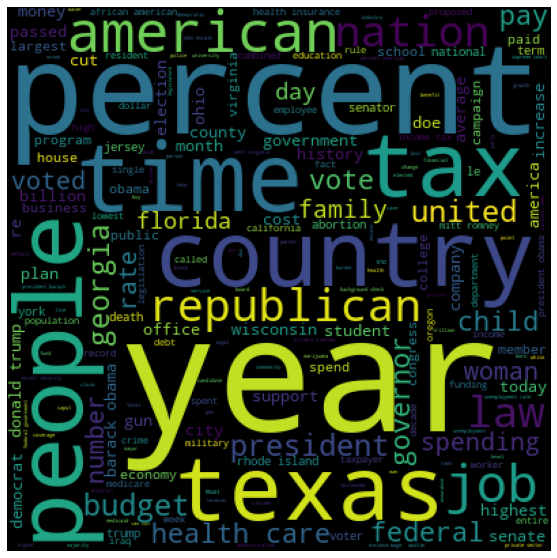

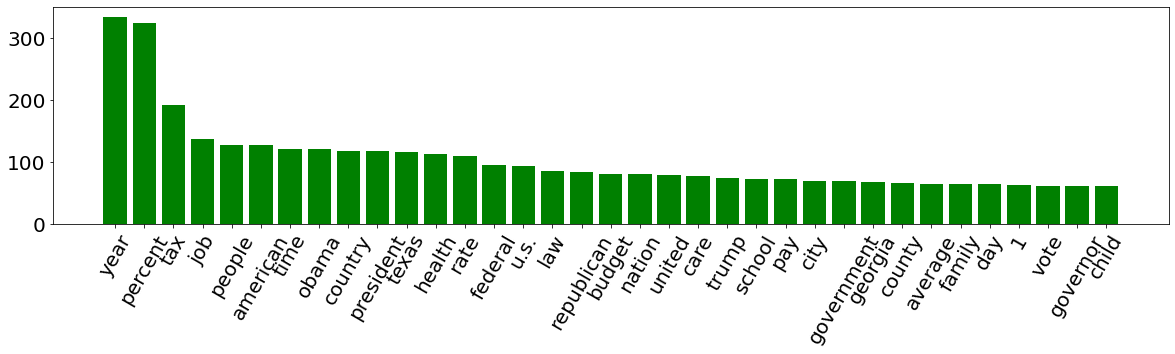

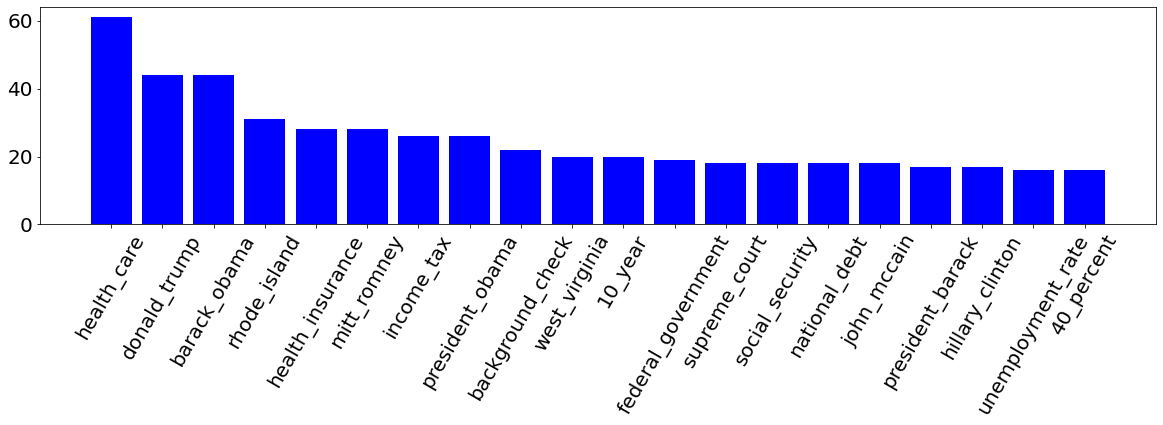

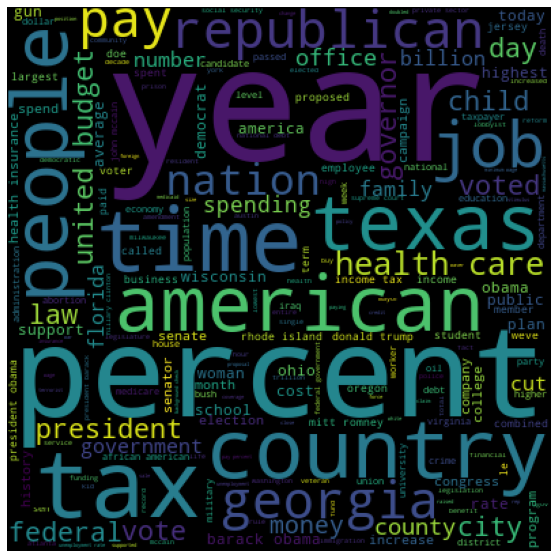

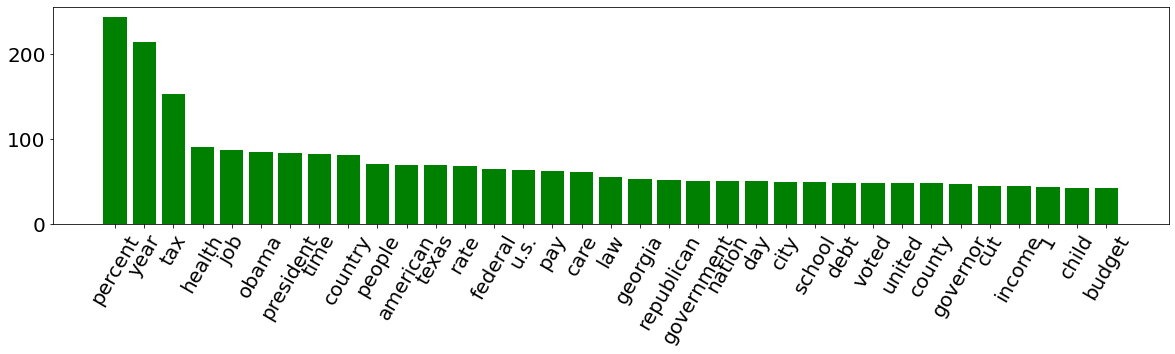

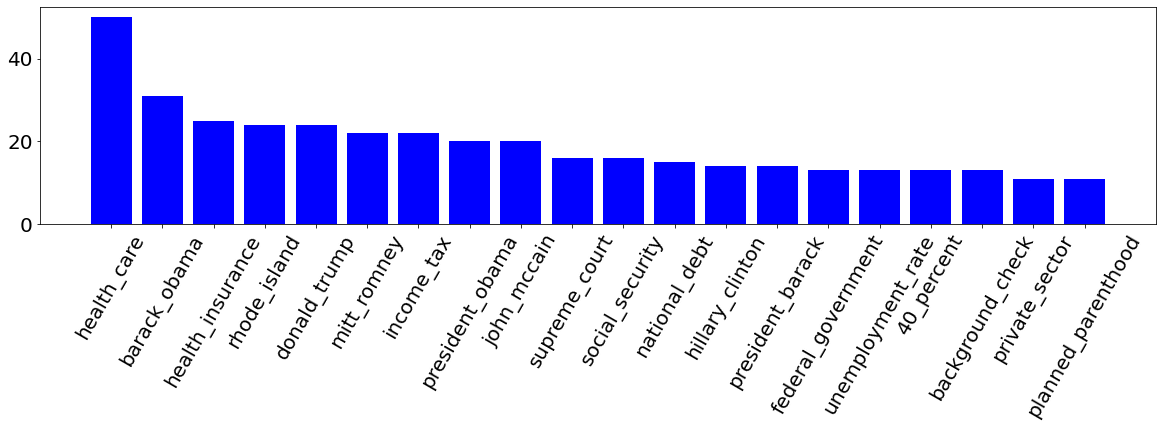

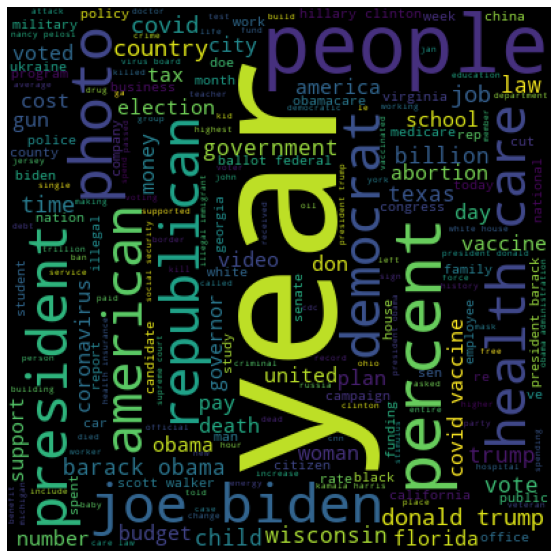

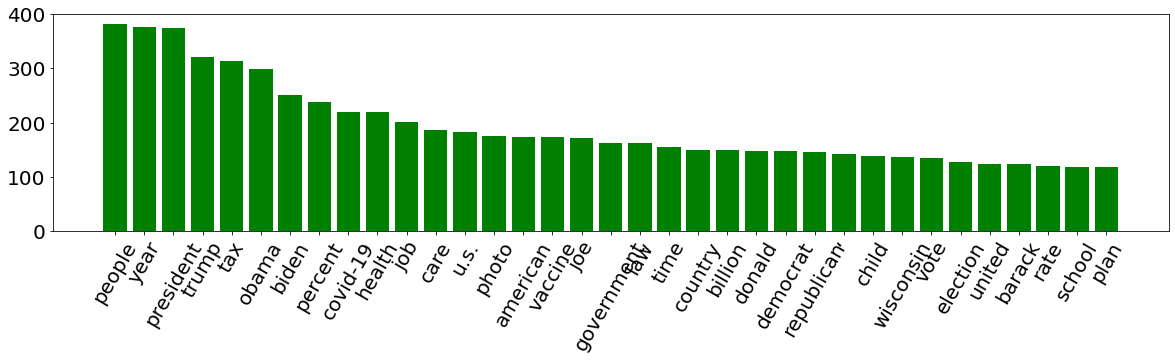

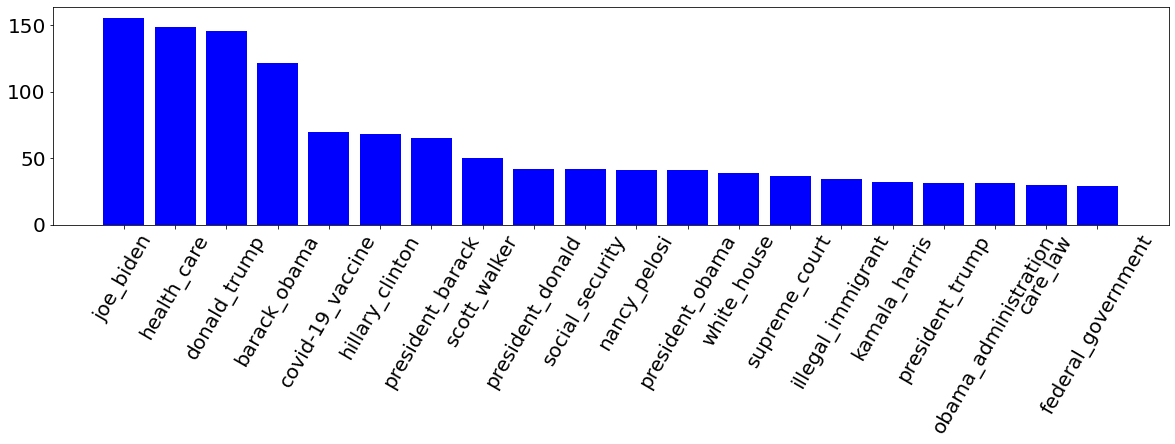

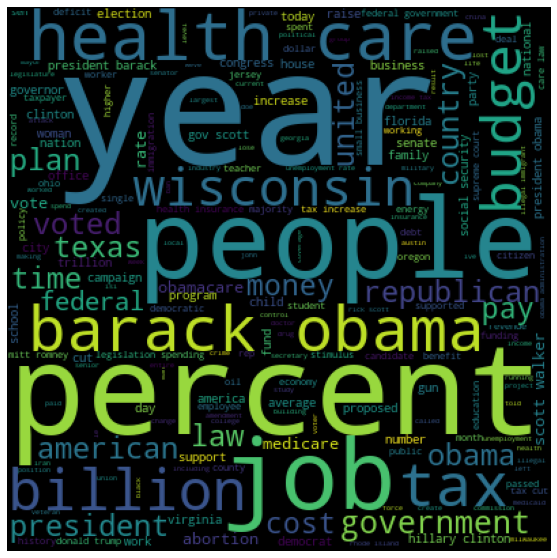

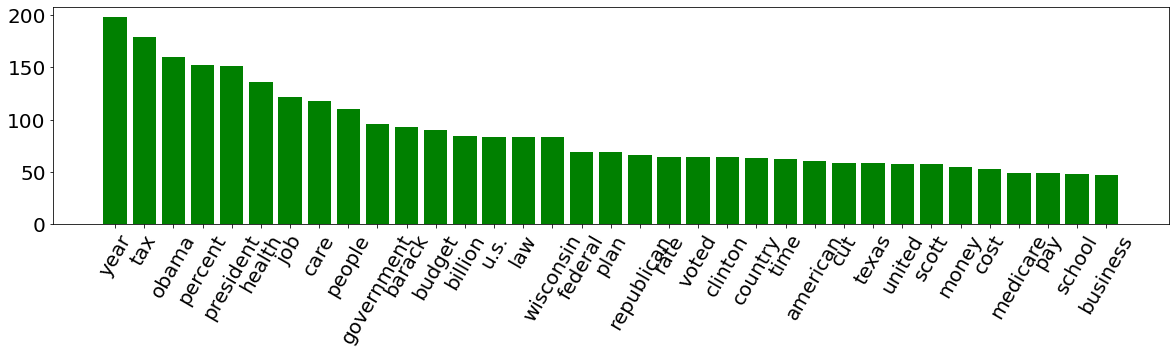

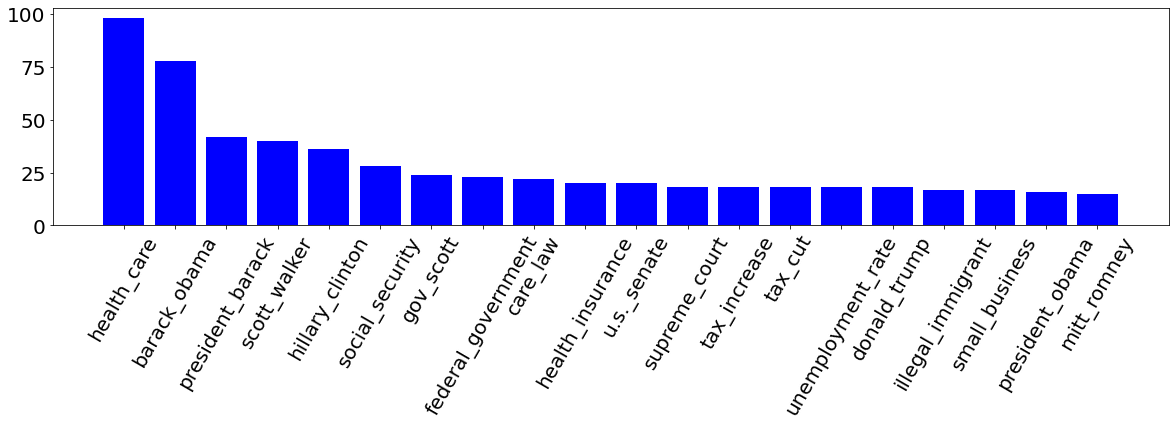

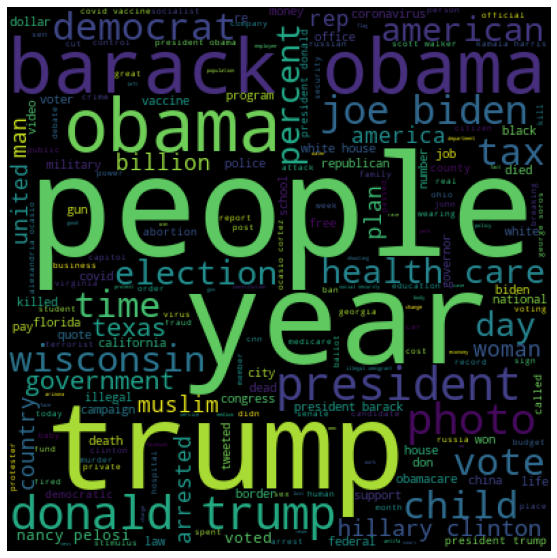

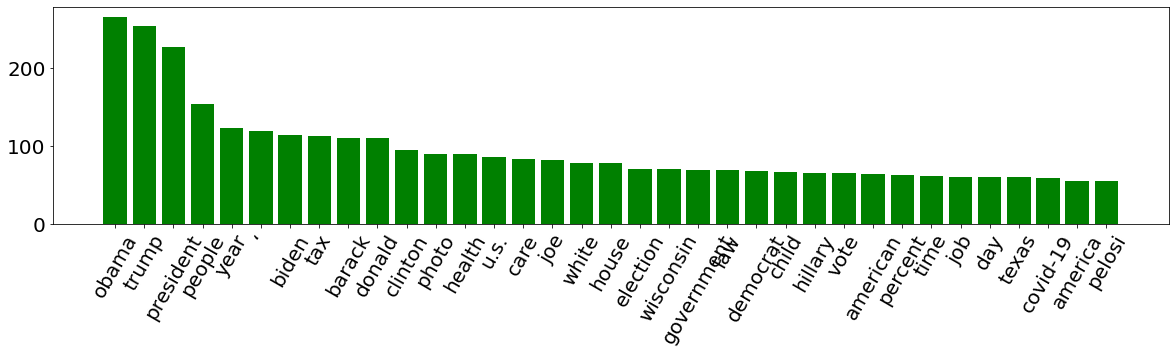

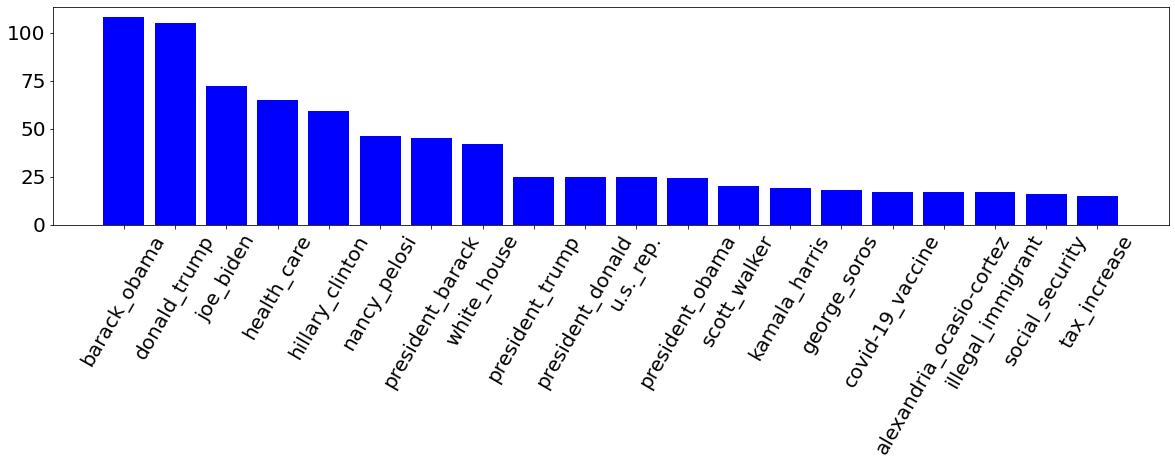

In [ ]:
true_dic=plotAll(df_clean_true,"true")
L_true_dic=plotAll(df_L_true_clean,"L_true")
false_dic=plotAll(df_clean_false,"false")
L_false_dic=plotAll(df_L_false_clean,"L_false")
fire_dic=plotAll(df_clean_fire,"fire")

In [ ]:
shared={}
in_true={}
in_false={}

for k,v in true_dic.items():


  if(k in false_dic):
    if(false_dic[k]-v>=120):
     print(k)
     pass
    shared[k]=v-false_dic[k]
  else:
    in_true[k]=v

for k,v in false_dic.items():
  if(k in true_dic):
    continue
  else:
    in_false[k]=v



tax
people
obama
president
trump
covid-19
joe
photo
biden
vaccine


In [ ]:
def get_stats(df,title):
  #place = df.groupby('Name').size().sort_values(ascending=False)
  date=df.groupby('Date').size().sort_values(ascending=False)[0:50]
  df1=date.reset_index()

  Sep = df1.loc[(df1['Date'].str.contains('Sep'))]
  Oct = df1.loc[(df1['Date'].str.contains('Oct'))]
  Nov = df1.loc[(df1['Date'].str.contains('November'))]
  Dec= df1.loc[(df1['Date'].str.contains('Dec'))]
  Jan= df1.loc[(df1['Date'].str.contains('Jan'))]
  Feb= df1.loc[(df1['Date'].str.contains('Feb'))]
  March= df1.loc[(df1['Date'].str.contains('March'))]
  April= df1.loc[(df1['Date'].str.contains('April'))]
  May= df1.loc[(df1['Date'].str.contains('May'))]
  June= df1.loc[(df1['Date'].str.contains('June'))]
  July= df1.loc[(df1['Date'].str.contains('July'))]
  August= df1.loc[(df1['Date'].str.contains('August'))]
  list_of_months=[Sep,Oct,Oct,Nov,Dec,Jan,Feb,March,April,May,June,July,August]
  for month in list_of_months:
    display(month)
  print("this is for ",title)
  #print(place[0:20])

  print(" \n\n")

In [ ]:
get_stats(df_clean_false,'fake')
pd.options.display.max_colwidth = 200
display(df_clean_false[df_clean_false['Date']=="September 29, 2020"])

display(df_clean_false[df_clean_false['Date']=="September 27, 2010"])




,Date,0
3,"September 29, 2020",13
9,"September 27, 2010",10
10,"September 17, 2020",10
16,"September 2, 2020",9


,Date,0
4,"October 27, 2021",12
6,"October 28, 2015",11
31,"October 13, 2020",8
40,"October 22, 2018",8
42,"October 26, 2021",8
49,"October 12, 2020",7


,Date,0
4,"October 27, 2021",12
6,"October 28, 2015",11
31,"October 13, 2020",8
40,"October 22, 2018",8
42,"October 26, 2021",8
49,"October 12, 2020",7


,Date,0
0,"November 4, 2020",29
1,"November 5, 2020",15
17,"November 3, 2020",9
48,"November 11, 2020",7


,Date,0
8,"December 15, 2020",11
11,"December 8, 2020",9


,Date,0
5,"January 6, 2021",11
18,"January 19, 2022",9
19,"January 26, 2020",9
24,"January 31, 2022",9
33,"January 4, 2022",8
35,"January 25, 2021",8
39,"January 7, 2021",8
41,"January 7, 2020",8


,Date,0
14,"February 20, 2020",9
47,"February 8, 2021",7


,Date,0
15,"March 25, 2021",9
25,"March 23, 2020",9
26,"March 18, 2019",8
34,"March 16, 2020",8
45,"March 4, 2020",8


,Date,0
23,"April 6, 2020",9
27,"April 13, 2020",8
29,"April 2, 2020",8
46,"April 22, 2020",8


,Date,0
22,"May 19, 2021",9
32,"May 31, 2020",8


,Date,0
7,"June 1, 2020",11
12,"June 28, 2018",9
13,"June 28, 2010",9
21,"June 28, 2012",9
30,"June 14, 2020",8
38,"June 21, 2021",8
43,"June 23, 2020",8


,Date,0
20,"July 14, 2020",9
36,"July 21, 2020",8
37,"July 17, 2020",8
44,"July 20, 2021",8


,Date,0
2,"August 31, 2020",13
28,"August 28, 2012",8


this is for  fake
 




,Date,Clean_tweet
1327,"September 29, 2020","[ballot, wisconsin, dumped, river, creek]"
1337,"September 29, 2020","[nyt, correcting, lies..trump, paid, 1m, 2016, 3.8m, 2017-18..they, lied..again, info, twitter]"
1351,"September 29, 2020","[don, doubt, joe, biden, senile]"
1352,"September 29, 2020","[poll, watcher, philadelphia, thrown]"
1353,"September 29, 2020","[coronavirus, pandemic, united, greatest, economy, history, country]"
1354,"September 29, 2020","[manufacturing, brought, 700,000, job, obama, biden, brought]"
1355,"September 29, 2020","[joe, biden, 308,000, military, people, dying, couldn, provide, proper, healthcare, military]"
1357,"September 29, 2020","[delaware, forgot, college]"
1360,"September 29, 2020","[merrick, garland, investigating, donald, trump, tax, evasion, case]"
5876,"September 29, 2020","[joe, biden, 14,000, people, died, h1n1, fact, checking, 574,000]"


,Date,Clean_tweet
4953,"September 27, 2010","[tom, perriello, voted, tax, break, foreign, company, creating, job, china]"
4979,"September 27, 2010","[steve, southerland, pay, tax, '05, '06, '07, '08, '09]"
4982,"September 27, 2010","[debbie, jackow, opponent, de-fund, 20/20, land, program]"
4984,"September 27, 2010","[shaughnessy, voted, personal, stimulus, package, --, taxpayer-funded, pay, raise]"
4986,"September 27, 2010","[peter, kilmartin, voted, favor, expanding, 'good, behavior, statute, sex, offender]"
4992,"September 27, 2010","[rasmussen, supported, sale, tax, spring]"
4996,"September 27, 2010","[job, incentive, program, created, 1,200, high-wage, job, 2009]"
4999,"September 27, 2010","[wisconsin, legislature, raised, tax, 5, billion, 2009]"
7850,"September 27, 2010","[rick, scott, doe, tie, lobbyist]"
7856,"September 27, 2010","[campaign, contribution, rival, house, seat, money, intended, schoolchildren]"


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_finder(df,col_name):
  neg_list=[]
  pos_list=[]
  for i in df[col_name]:
    res=sid.polarity_scores(i)
    if(res['neg']!=0): 
      neg_list.append(res['neg'])
    if(res['pos']!=0):
      pos_list.append(res['pos'])
  print()
  print(sum(neg_list)/len(neg_list))
  print(sum(pos_list)/len(pos_list))
  #df["neg_sent"]=neg_list
  #df["pos_sent"]=pos_list
  return df
df_true=sentiment_finder(df_true,"Statement")
df_fake=sentiment_finder(df_fake,"Statement")
df_pants=sentiment_finder(df_pants,"Statement")
df_L_true=sentiment_finder(df_L_true,'statement')
df_L_false=sentiment_finder(df_L_false,'statement')


0.18301899441340788
0.1574413347685683

0.19414965034965007
0.16440993132593767

0.21397924187725662
0.1773176733780761

0.19114463452566105
0.1635515695067264

0.1883555555555556
0.17199154589372


In [ ]:
def sentiment_finder(df,name):
  neg_list=[]
  pos_list=[]
  for i in df["Clean_tweet"]:
    text=' '.join([str(item)for item in i])
    res=sid.polarity_scores(text)
    if(res['neg']!=0): 
      neg_list.append(res['neg'])
    if(res['pos']!=0):
      pos_list.append(res['pos'])
  print(name)
  print(sum(neg_list)/len(neg_list))
  print(sum(pos_list)/len(pos_list))
sentiment_finder(df_clean_true,"true")
sentiment_finder(df_clean_false,"fake")
sentiment_finder(df_clean_fire,"fire")

true
0.31321651785714305
0.2849577836411611
fake
0.32346228150874023
0.28249455535390133
fire
0.3444112068965517
0.28476878612716744
